In [333]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from keras.layers import Dropout
import operator
import numpy as np
import matplotlib.pyplot as plt

In [334]:
digits = datasets.load_digits()
digits.keys()
images_data = digits['data']
image_output = digits['target'].reshape((len(images_data),1))
image_output.shape

(1797, 1)

In [335]:
x_train,x_test,y_train,y_test = train_test_split(images_data,image_output,test_size=0.4 , random_state=0)
x_temp_test = x_test
y_temp_test = y_test
x_train.shape

(1078, 64)

In [336]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [337]:
x_train

array([[ 0.        , -0.34249754, -1.07638305, ..., -0.25911678,
        -0.48330553, -0.17299298],
       [ 0.        ,  2.79528442,  1.00457271, ..., -0.77353277,
        -0.48330553, -0.17299298],
       [ 0.        , -0.34249754,  0.1721904 , ...,  0.25529922,
        -0.48330553, -0.17299298],
       ..., 
       [ 0.        , -0.34249754, -0.03590517, ..., -1.11647677,
        -0.48330553, -0.17299298],
       [ 0.        , -0.34249754, -0.24400075, ..., -1.11647677,
        -0.48330553, -0.17299298],
       [ 0.        , -0.34249754,  0.1721904 , ...,  0.76971522,
        -0.48330553, -0.17299298]])

In [338]:
onehotencoder = OneHotEncoder(categorical_features=[0])
y_train=onehotencoder.fit_transform(y_train).toarray()
y_test=onehotencoder.fit_transform(y_test).toarray()
y_train.shape

(1078, 10)

In [339]:
classifier = Sequential()

classifier.add(Dense(units=25,activation='relu',kernel_initializer='uniform',input_dim=64))
classifier.add(Dropout(rate=0.1))
classifier.add(Dense(units=20,activation='relu',kernel_initializer='uniform'))
classifier.add(Dropout(rate=0.1))
classifier.add(Dense(units=15,activation='relu',kernel_initializer='uniform'))
classifier.add(Dropout(rate=0.1))
classifier.add(Dense(units=10,activation='softmax',kernel_initializer='uniform'))

#opt = optimizers.SGD(lr=0.01)
classifier.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

classifier.fit(x_train,y_train,batch_size=128,epochs=100)

Epoch 1/100
1078/1078 [==============================] - 1s 1ms/step - loss: 2.3024 - acc: 0.1521
Epoch 2/100
1078/1078 [==============================] - 0s 32us/step - loss: 2.3012 - acc: 0.2143
Epoch 3/100
1078/1078 [==============================] - 0s 33us/step - loss: 2.2981 - acc: 0.2430
Epoch 4/100
1078/1078 [==============================] - 0s 39us/step - loss: 2.2892 - acc: 0.2996
Epoch 5/100
1078/1078 [==============================] - 0s 35us/step - loss: 2.2662 - acc: 0.3061
Epoch 6/100
1078/1078 [==============================] - 0s 37us/step - loss: 2.2144 - acc: 0.3071
Epoch 7/100
1078/1078 [==============================] - 0s 39us/step - loss: 2.1264 - acc: 0.3080
Epoch 8/100
1078/1078 [==============================] - 0s 32us/step - loss: 1.9860 - acc: 0.3098
Epoch 9/100
1078/1078 [==============================] - 0s 37us/step - loss: 1.8332 - acc: 0.3275
Epoch 10/100
1078/1078 [==============================] - 0s 36us/step - loss: 1.6850 - acc: 0.3636
Epoch 11/1

1078/1078 [==============================] - 0s 35us/step - loss: 0.1692 - acc: 0.9425
Epoch 84/100
1078/1078 [==============================] - 0s 32us/step - loss: 0.1833 - acc: 0.9425
Epoch 85/100
1078/1078 [==============================] - 0s 34us/step - loss: 0.1744 - acc: 0.9416
Epoch 86/100
1078/1078 [==============================] - 0s 37us/step - loss: 0.1555 - acc: 0.9518
Epoch 87/100
1078/1078 [==============================] - 0s 34us/step - loss: 0.1710 - acc: 0.9416
Epoch 88/100
1078/1078 [==============================] - 0s 36us/step - loss: 0.1825 - acc: 0.9434
Epoch 89/100
1078/1078 [==============================] - 0s 36us/step - loss: 0.1658 - acc: 0.9490
Epoch 90/100
1078/1078 [==============================] - 0s 35us/step - loss: 0.1653 - acc: 0.9471
Epoch 91/100
1078/1078 [==============================] - 0s 36us/step - loss: 0.1499 - acc: 0.9490
Epoch 92/100
1078/1078 [==============================] - ETA: 0s - loss: 0.3242 - acc: 0.898 - 0s 35us/step - lo

In [340]:
y_pred = classifier.predict(x_test)
y_pred

array([[  1.01121675e-22,   1.68660499e-05,   9.98898029e-01, ...,
          7.56982810e-10,   1.48520019e-04,   2.78931587e-12],
       [  3.29152073e-07,   6.60946639e-03,   6.90535700e-04, ...,
          9.86643869e-08,   9.84872460e-01,   7.85536395e-06],
       [  4.75113481e-32,   1.56001491e-07,   9.99951005e-01, ...,
          1.51219816e-13,   2.23319194e-06,   4.29581461e-17],
       ..., 
       [  1.22173260e-33,   1.26867130e-08,   9.99919891e-01, ...,
          1.17660864e-14,   1.74828699e-06,   7.99159621e-18],
       [  2.62623213e-12,   2.12424711e-05,   2.55693844e-09, ...,
          9.99907613e-01,   4.55322141e-13,   6.36717377e-05],
       [  5.63100584e-05,   5.20995930e-02,   9.73275900e-02, ...,
          1.87300018e-03,   7.50050485e-01,   9.50804725e-03]], dtype=float32)

Actual output : 4
Predicted Output output : 4


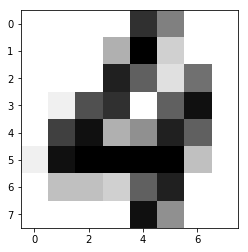

In [353]:
rnd = np.random.randint(0,len(y_test))
print('Actual output :' , y_temp_test[rnd][0])
max_index, max_value = max(enumerate(y_pred[rnd]), key=operator.itemgetter(1))
print('Predicted Output output :' , max_index)
data = x_temp_test[rnd].reshape((8,8))
plt.imshow(255-data)
plt.gray()
plt.show()